<a href="https://colab.research.google.com/github/alearauj/mentoriabv/blob/main/Mentoria_BV_An%C3%A1lise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto de análise de dados realizado durante a mentoria técnica promovida pelo banco BV**

**Objetivo da análise**: entender como as características de uma casa afetam seu preço de venda e tentar prever o preço com base nas características.

# Etapas do projeto:

1. **Análise Descritiva**: ✅
*  Importação e revisão inicial dos dados
*   Resumo estatístico - estatísticas básicas que descrevem as principais características dos dados
*   Distribuições de Variáveis - histogramas, boxplots, KDE e gráfico de barra
*   Identificação de dados faltantes
---
2. **Análise Exploratória**
*   Visualização de distribuições
*   Análise de correlação
*   Exploração de relações entre variáveis - Scatter Plots, Pairplots e Análise Bivariada
*   Segmentação e Agrupamento - K-means Clustering, Hierarchical Clustering e Perfil de Segmentos
---
3. **Análise Diagnóstica**
*   Identificação de Anomalias e Outliers
*   Análise de Causas
*   Comparação de Subgrupos
*   Teste de Hipóteses
---

4. **Análise Preditiva**

*   Preparação dos Dados: Prepare os dados para modelagem, o que inclui tratamento de dados faltantes, codificação de variáveis categóricas, normalização ou padronização de variáveis, e criação de variáveis derivadas se necessário.
*   Divisão dos Dados: Divida o conjunto de dados em conjuntos de treinamento e teste (geralmente 70/30 ou 80/20) para validar o desempenho do modelo.

*   Escolha do Modelo Preditivo: Regressão Linear para prever uma variável numérica contínua
---
5. **Recomendações e Implementação**
*   Documentação das descobertas
*   Visualização de resultados
*   Comunicação dos resultados

## **Preparação do ambiente**

**Liberação das bibliotecas**

In [1]:
# Acesse as bibliotecas necessarias

import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

from scipy.stats import zscore

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importação e leitura do arquivo csv**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Use o pandas para ler o arquivo CSV -- Lembre-se de atualizar o caminho.

# Especificar o caminho para o arquivo
df = pd.read_csv('/content/drive/MyDrive/Dados para Portfolio/Mentoria BV/train.csv', sep=',', encoding='utf-8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Exiba as primeiras linhas do DataFrame para verificar se os dados foram lidos corretamente
print(df.head(3))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     V

## **Conhecendo os dados**

**Removendo colunas**

In [4]:
# Remover múltiplas colunas
df = df.drop(['MSSubClass', 'LotFrontage', 'Condition1', 'Condition2', 'BsmtFinSF1', 'BsmtFinSF2', 'Alley'], axis=1)

**Checar tamanho do arquivo**

In [5]:
df.shape

(1460, 74)

**Conhecer a tipagem dos dados**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

**Checar os dados**

In [7]:
df.head(10)

,Id,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,Unf,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,Unf,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


**Encontrar valores nulos**

In [8]:
# Selecionar as colunas que têm valores nulos
cols_with_na = df.columns[df.isna().sum() > 0]

# Exibir essas colunas e o número de valores nulos
print(df[cols_with_na].isna().sum())

MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Precisamos entender o que os valores nulos significam em cada uma das colunas para definirmos o que faremos com eles.


* BsmtExposure tem um NA (que sinignifa No Basement) mas com valores nas colunas de qualidade de basement

In [9]:
df['MasVnrType'].fillna('None', inplace=True)

In [10]:
# Substituir valores para 'NA' baseado nas condições
df.loc[(df['BsmtExposure'] == 'NA') & (df['BsmtQual'] == 'Gd'), 'BsmtQual'] = 'NA'
df.loc[(df['BsmtExposure'] == 'NA') & (df['BsmtCond'] == 'TA'), 'BsmtCond'] = 'NA'

In [11]:
# Selecionar as colunas que têm valores nulos
cols_with_na = df.columns[df.isna().sum() > 0]

# Exibir essas colunas e o número de valores nulos
print(df[cols_with_na].isna().sum())

MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


**Encontrar valores duplicados**

In [ ]:
df.duplicated().sum()

0

## **Análise Descritiva**

In [12]:
df = df[['LotArea', 'OverallQual', 'YearBuilt', 'YrSold', 'SalePrice', 'OverallCond', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'PoolArea']]


df.describe()

,LotArea,OverallQual,YearBuilt,YrSold,SalePrice,OverallCond,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,PoolArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,1971.267808,2007.815753,180921.195890,5.575342,1.565068,2.866438,1.046575,6.517808,2.758904
std,9981.264932,1.382997,30.202904,1.328095,79442.502883,1.112799,0.550916,0.815778,0.220338,1.625393,40.177307
min,1300.000000,1.000000,1872.000000,2006.000000,34900.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,7553.500000,5.000000,1954.000000,2007.000000,129975.000000,5.000000,1.000000,2.000000,1.000000,5.000000,0.000000
50%,9478.500000,6.000000,1973.000000,2008.000000,163000.000000,5.000000,2.000000,3.000000,1.000000,6.000000,0.000000
75%,11601.500000,7.000000,2000.000000,2009.000000,214000.000000,6.000000,2.000000,3.000000,1.000000,7.000000,0.000000
max,215245.000000,10.000000,2010.000000,2010.000000,755000.000000,9.000000,3.000000,8.000000,3.000000,14.000000,738.000000


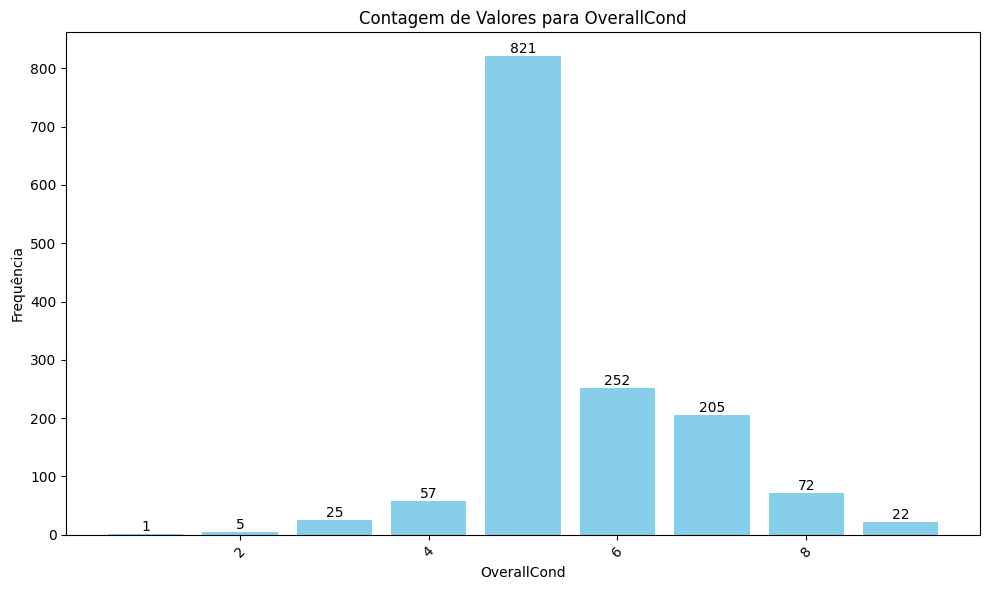

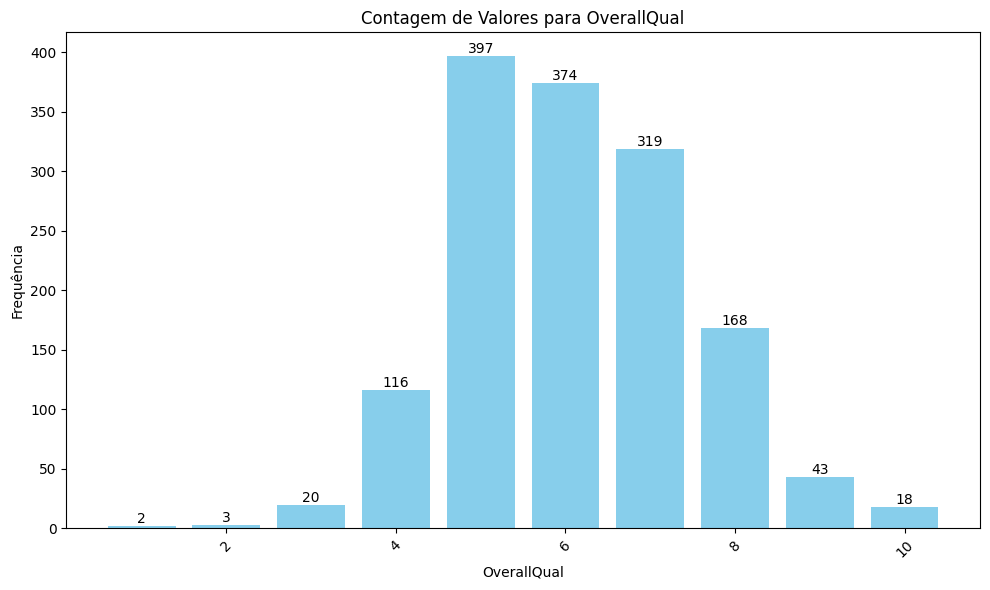

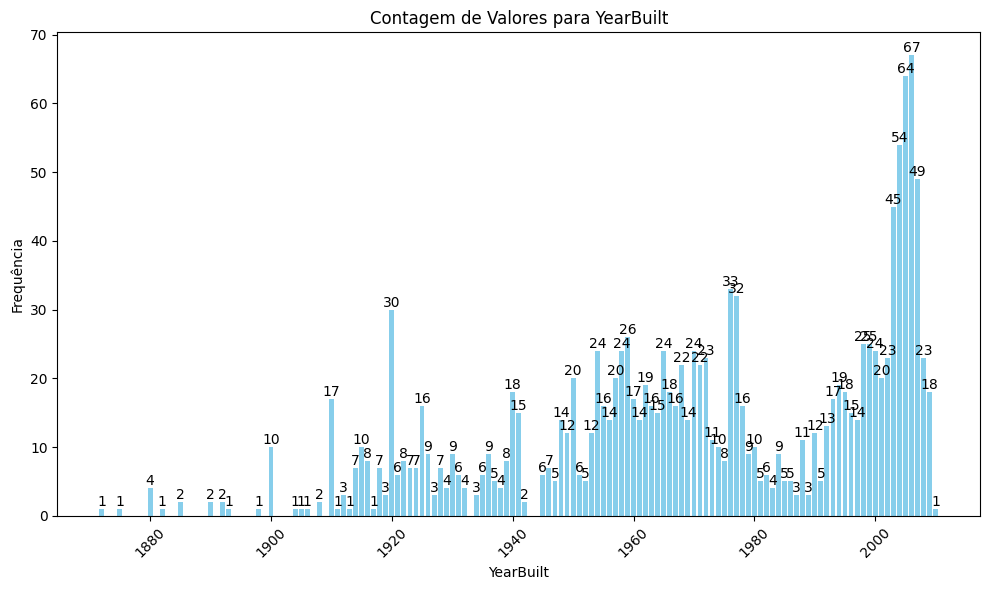

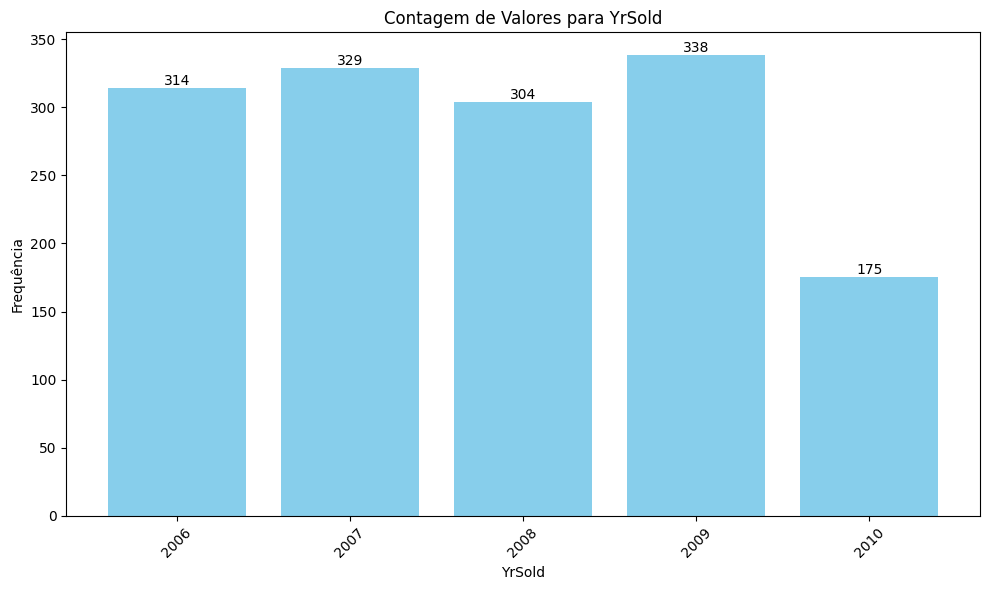

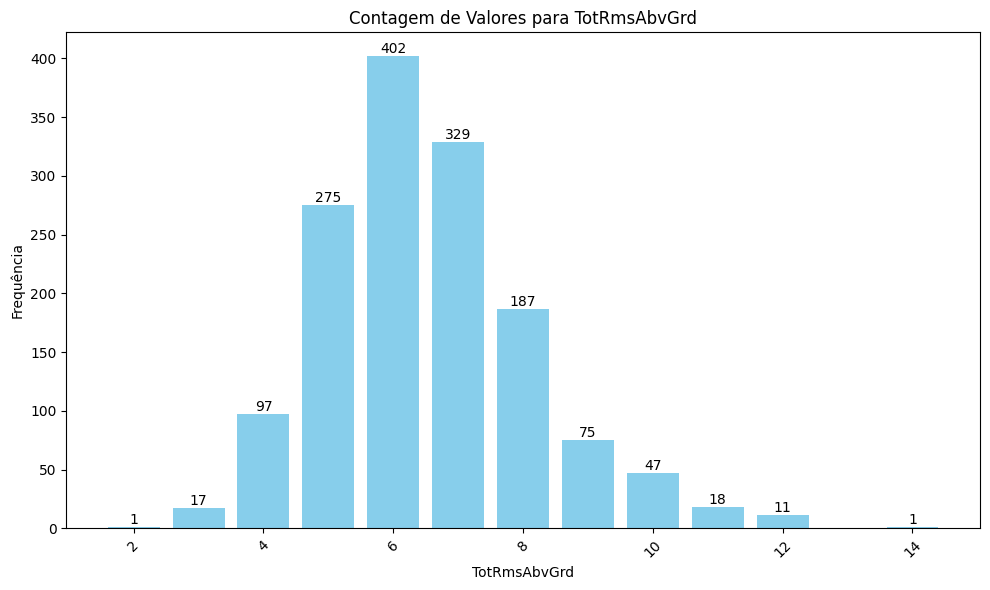

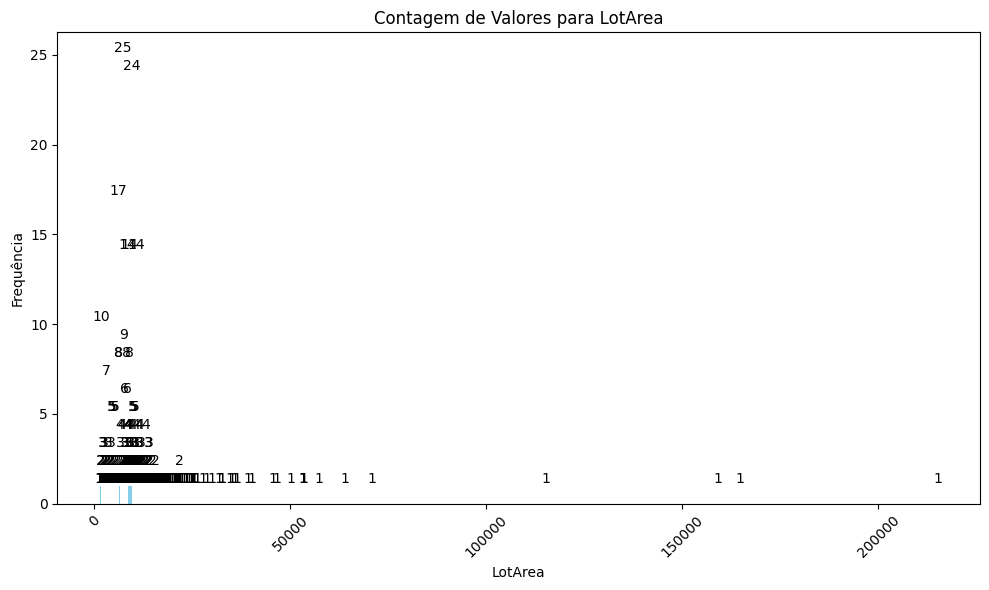

In [17]:
# Selecionar as colunas que você deseja exibir em gráficos de barras
columns = ['OverallCond', 'OverallQual', 'YearBuilt', 'YrSold', 'TotRmsAbvGrd', 'LotArea']

# Iterar sobre as colunas e criar gráficos de barras
for col in columns:
    plt.figure(figsize=(10, 6))
    value_counts = df[col].value_counts().sort_index()  # Ordenar os valores

    # Criar o gráfico de barras
    bars = plt.bar(value_counts.index, value_counts.values, color='skyblue')

    # Adicionar rótulos nas barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

    # Adicionar título e rótulos
    plt.title(f'Contagem de Valores para {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)

    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

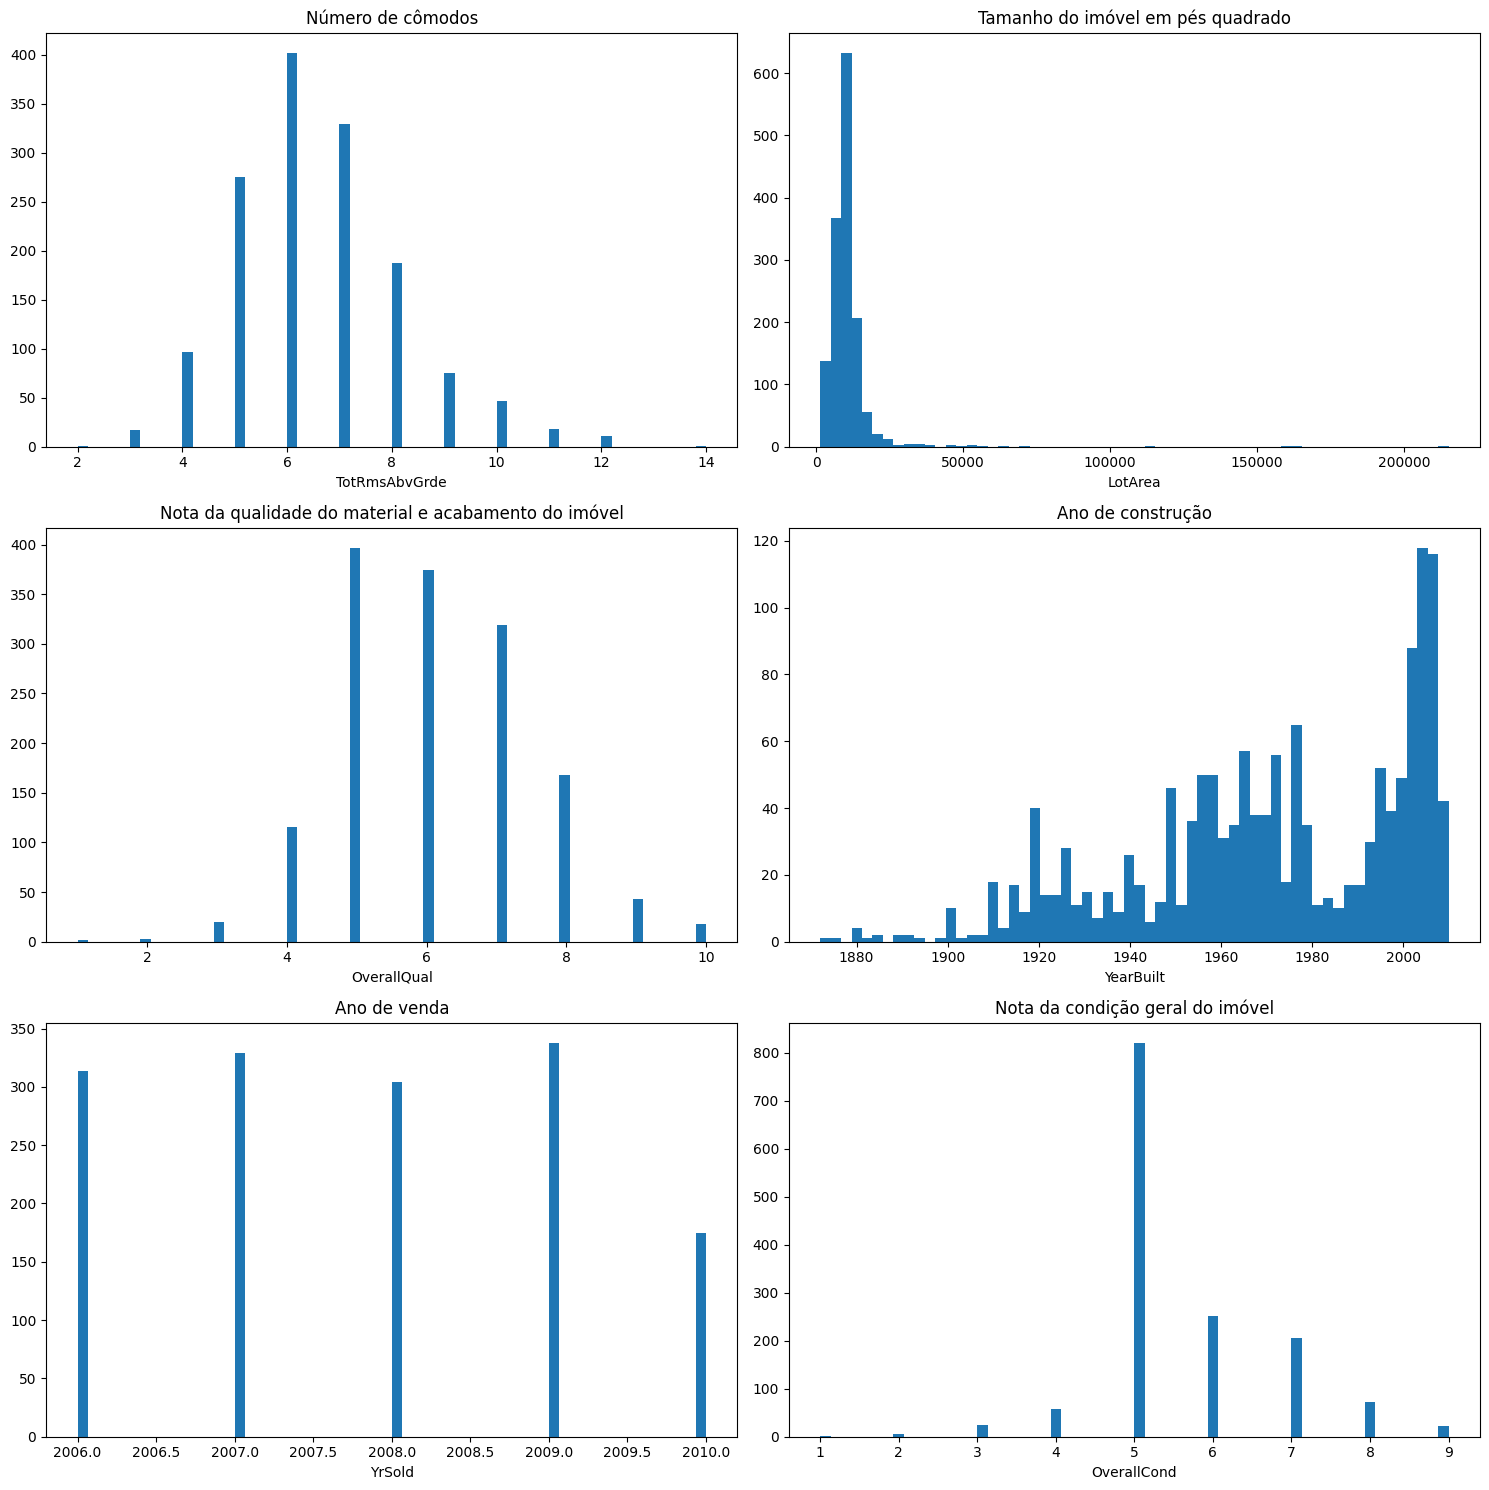

In [15]:
# Criar subplots com 3 linhas e 2 colunas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))  # Ajuste o tamanho conforme necessário

# Criar histogramas em cada subplot

axes[2, 1].hist(df['OverallCond'], bins=60)
axes[2, 1].set_xlabel('OverallCond')
axes[2, 1].set_title('Nota da condição geral do imóvel')

axes[1, 0].hist(df['OverallQual'], bins=60)
axes[1, 0].set_xlabel('OverallQual')
axes[1, 0].set_title('Nota da qualidade do material e acabamento do imóvel')


axes[1, 1].hist(df['YearBuilt'], bins=60)
axes[1, 1].set_xlabel('YearBuilt')
axes[1, 1].set_title('Ano de construção')

axes[2, 0].hist(df['YrSold'], bins=60)
axes[2, 0].set_xlabel('YrSold')
axes[2, 0].set_title('Ano de venda')


axes[0, 0].hist(df['TotRmsAbvGrd'], bins=60)
axes[0, 0].set_xlabel('TotRmsAbvGrde')
axes[0, 0].set_title('Número de cômodos')

axes[0, 1].hist(df['LotArea'], bins=60)
axes[0, 1].set_xlabel('LotArea')
axes[0, 1].set_title('Tamanho do imóvel em pés quadrado')


# Ajustar o layout
plt.tight_layout()
plt.show()

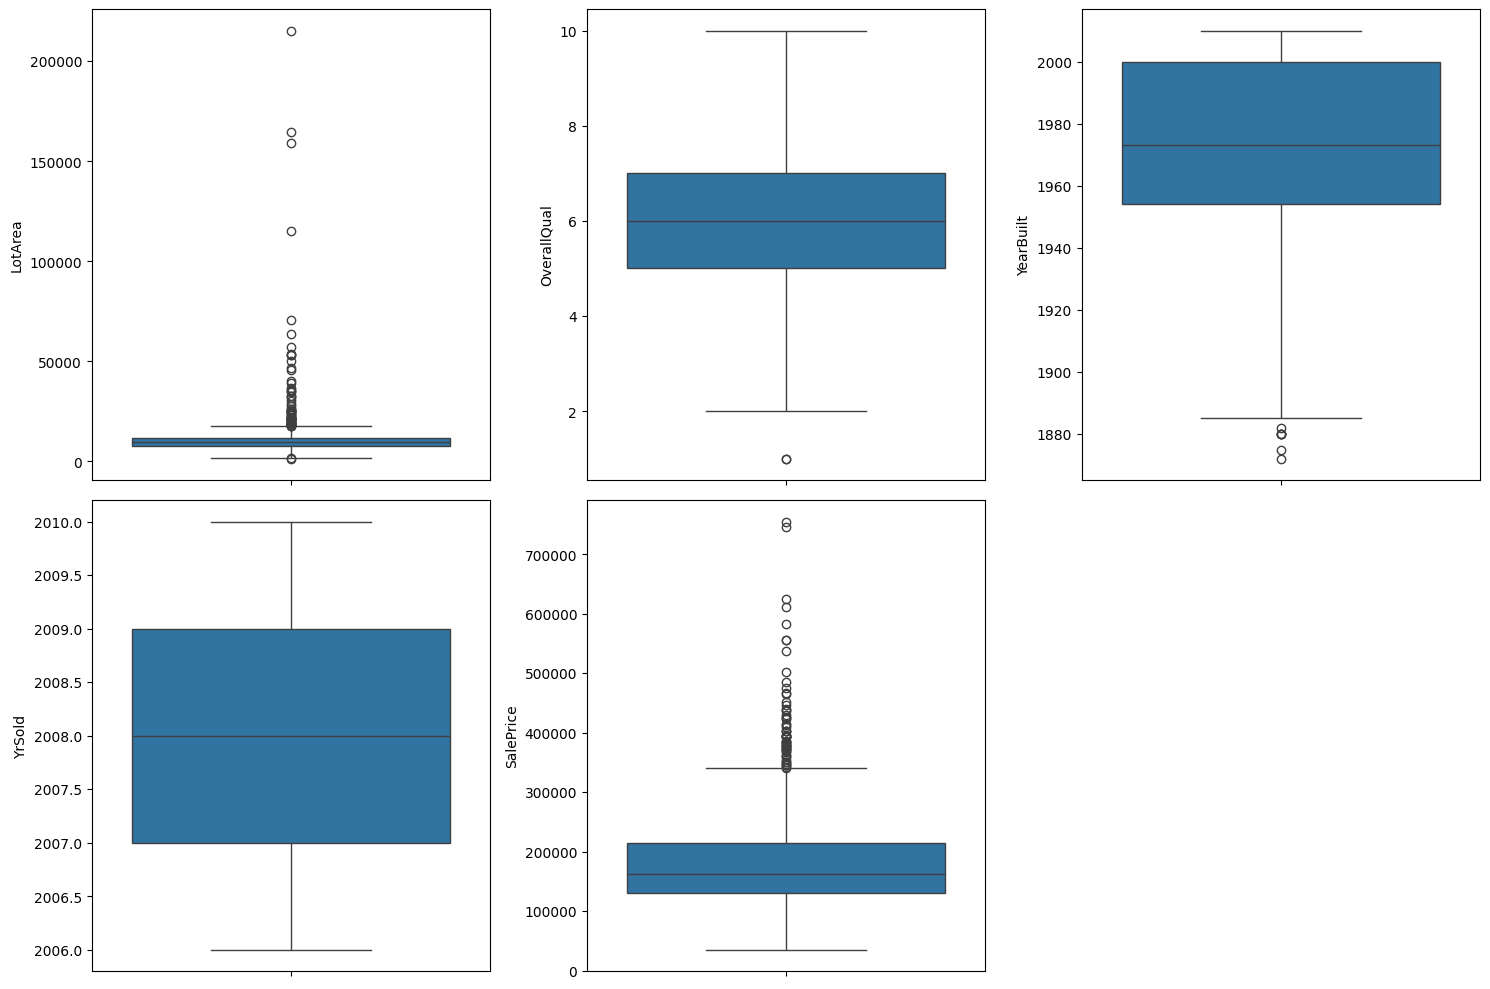

In [ ]:
# Criar o layout com 2 linhas e 3 colunas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Ajuste o tamanho conforme necessário

# Desenhar boxplots nos subplots
sns.boxplot(data=df, y='LotArea', ax=axes[0, 0])
sns.boxplot(data=df, y='OverallQual', ax=axes[0, 1])
sns.boxplot(data=df, y='YearBuilt', ax=axes[0, 2])
sns.boxplot(data=df, y='YrSold', ax=axes[1, 0])
sns.boxplot(data=df, y='SalePrice', ax=axes[1, 1])

# Deixar o subplot vazio para manter a estrutura 2x3
axes[1, 2].axis('off')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## **Análise Exploratória**

## **Análise Diagnóstica**

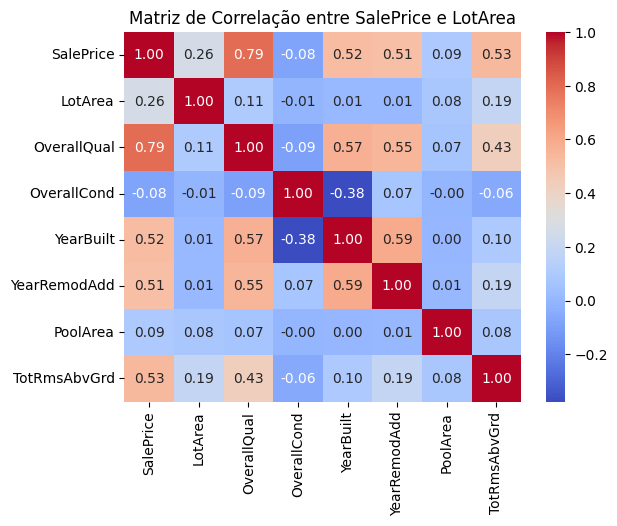

In [ ]:
# Selecionar apenas as colunas SalePrice e LotArea
selected_columns = ['SalePrice', 'LotArea', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'PoolArea', 'TotRmsAbvGrd']
numeric_df = df[selected_columns]

# Calcular a matriz de correlação
corr_matrix = numeric_df.corr()

# Visualizar a matriz de correlação
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre SalePrice e LotArea')
plt.show()

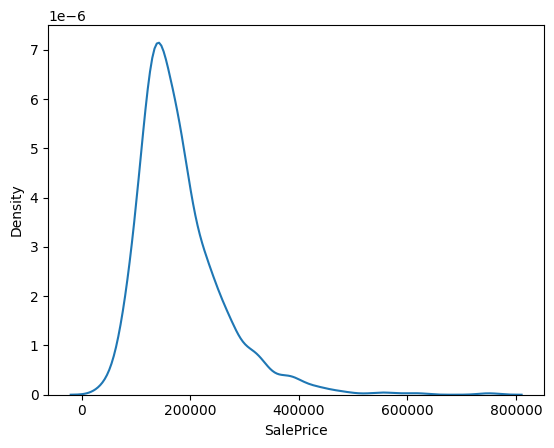

In [ ]:
## Análise de Distribuição

sns.kdeplot(df['SalePrice'])
plt.show()

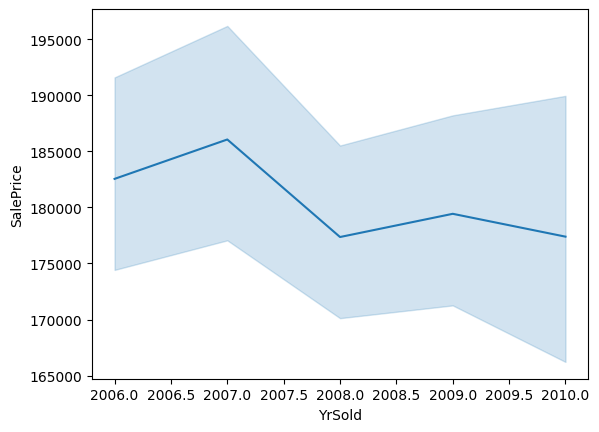

In [ ]:
## Análise de tendências temporais

sns.lineplot(x='YrSold', y='SalePrice', data=df)
plt.show()

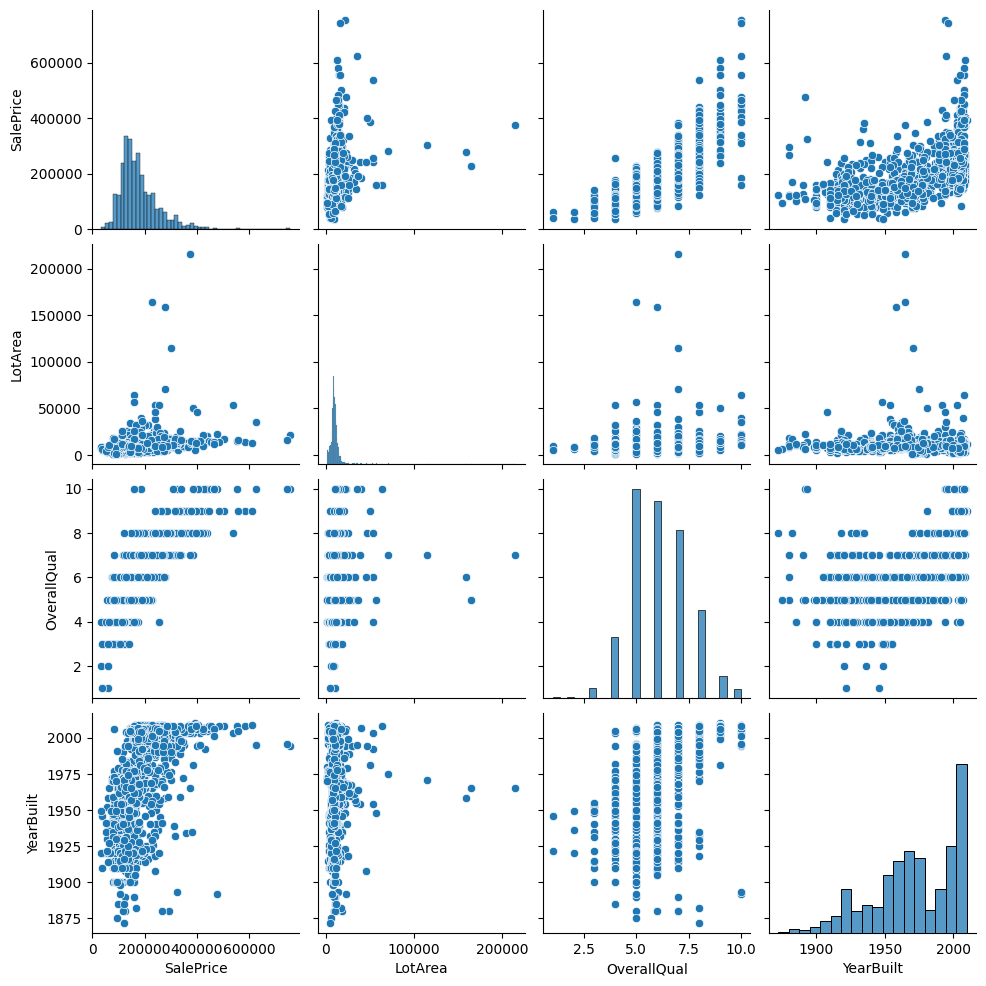

In [ ]:
# Selecionar as colunas SalePrice e outras colunas de interesse
selected_columns = ['SalePrice', 'LotArea', 'OverallQual', 'YearBuilt']  # Adicione outras colunas conforme necessário
subset_df = df[selected_columns]

# Criar a matriz de dispersão
sns.pairplot(subset_df)
plt.show()

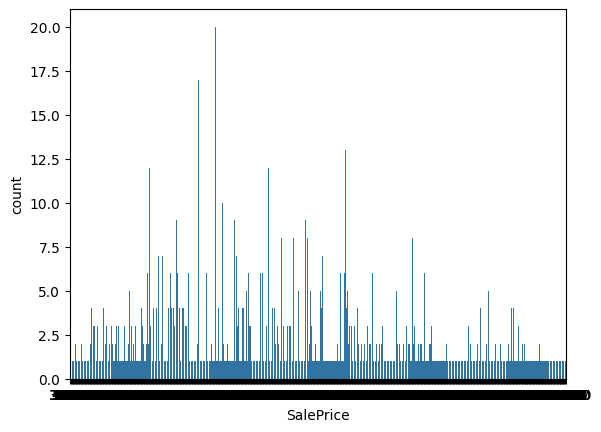

In [ ]:
# Análise de Frequência

sns.countplot(x='SalePrice', data=df)
plt.show()

In [ ]:
# Estatísticas Descritivas Adicionais
print("Skewness: ", df['SalePrice'].skew())
print("Kurtosis: ", df['SalePrice'].kurtosis())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


In [ ]:
# Análise de Outliers
df['zscore'] = zscore(df['SalePrice'])
outliers = df[df['zscore'].abs() > 3]
print(outliers)

        Id MSZoning  LotArea Street LotShape LandContour Utilities LotConfig  \
58      59       RL    13682   Pave      IR2         HLS    AllPub   CulDSac   
178    179       RL    17423   Pave      IR1         Lvl    AllPub   CulDSac   
185    186       RM    22950   Pave      IR2         Lvl    AllPub    Inside   
349    350       RL    20431   Pave      IR2         Lvl    AllPub    Inside   
389    390       RL    12474   Pave      Reg         Lvl    AllPub    Inside   
440    441       RL    15431   Pave      Reg         Lvl    AllPub    Inside   
473    474       RL    14977   Pave      IR1         Lvl    AllPub    Inside   
496    497       RL    12692   Pave      IR1         Lvl    AllPub    Inside   
527    528       RL    14948   Pave      IR1         Lvl    AllPub    Inside   
591    592       RL    13478   Pave      IR1         Lvl    AllPub    Corner   
664    665       RL    20896   Pave      IR2         Lvl    AllPub   CulDSac   
691    692       RL    21535   Pave     

Hipóteses:

- o preço varia com a zona do imóvel
- o preço varia com a largura da casa
- LotArea